In [15]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

sys.path.append('/Users/jordanlee/Projects/SummerProject/ParticleSwarm')

import pso as pso

In [16]:
def Ackley(X):
    n = X.shape[1]  # Number of dimensions (should be 20 for this problem)
    
    # Calculate the objective function value for each row in X
    term1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=1) / n))
    term2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=1) / n)
    y = term1 + term2 + 20 + np.e
    
    # Make function negative to find the minimum
    y = -y.reshape(-1, 1)
    
    return y

In [17]:
number_of_particles = 48
bounds = np.array([[-5, 10]] * 6)

species_1_hyperparameters = [0.6, 0.3, 0.55, 0]
species_2_hyperparameters = [0, 0, 0, 1]

iterations = 50

hyper_parameter_sets = np.array([species_1_hyperparameters, species_2_hyperparameters])

species_probabilities = np.array([1.0, 0.])

velocity_threshold = 1 / np.e**3
# velocity_threshold = 0
velocity_boost = 1 / np.e

In [18]:
optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
optimiser.InitialiseSwarm()

for i in range(iterations):
    X = optimiser.GetNextX()
    Y = Ackley(X)
    optimiser.UpdateOptimiser(Y)
    optimiser.WriteOutputToCSV('/Users/jordanlee/Projects/SummerProject/ParticleSwarm/test.csv')

optimiser.swarm.global_max, optimiser.swarm.global_max_position

(-0.021279753952356817,
 array([-0.00873282,  0.00219848,  0.0029162 , -0.00362206, -0.00584683,
         0.00352413]))

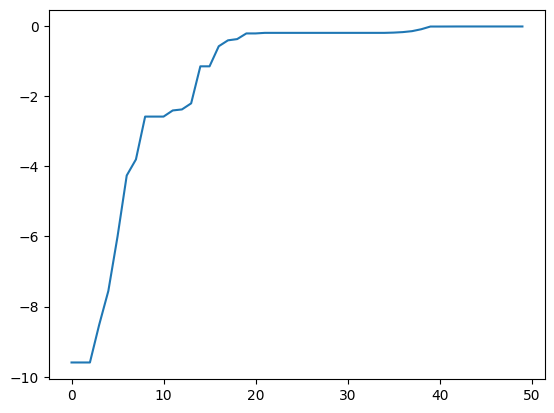

In [19]:
plt.plot(optimiser.swarm.global_max_history)

Text(0.5, 0, 'Iteration #')

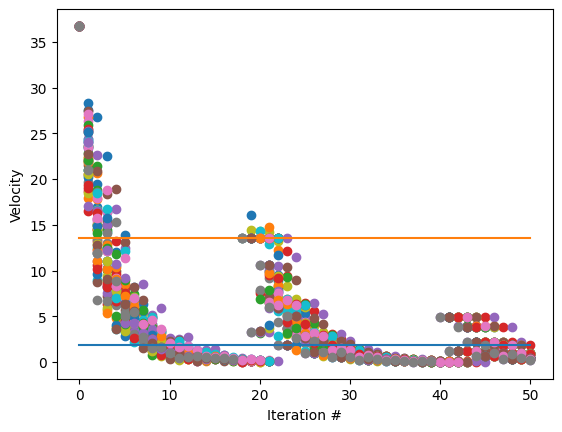

In [20]:
for particle in optimiser.swarm.particles:
    plt.scatter(range(optimiser.iteration + 1), np.linalg.norm(particle.velocity_history, axis=1))

plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3])
plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e])

plt.ylabel('Velocity')
plt.xlabel('Iteration #')

In [21]:
"""
For faster benchmarking:
"""

optimum = []
optimum_location = []

for i in range(400):
    optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
    optimiser.InitialiseSwarm()

    for i in range(iterations - 1):
        X = optimiser.GetNextX()
        Y = Ackley(X)
        optimiser.UpdateOptimiser(Y)

    optimum.append(optimiser.swarm.global_max)
    optimum_location.append(optimiser.swarm.global_max_position)
    
np.mean(optimum), np.mean(optimum_location, axis=0)

(-0.28009785385208824,
 array([0.0270452 , 0.02280745, 0.01010076, 0.03441604, 0.01106103,
        0.01975494]))